In [2]:
from rdkit.Chem import rdChemReactions, MolFromSmiles, MolFromSmarts, MolToSmiles

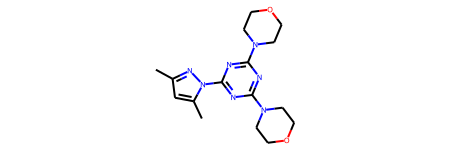

In [6]:
MolFromSmiles('Cc1cc(C)n(-c2nc(N3CCOCC3)nc(N3CCOCC3)n2)n1')

In [8]:
x = {"product": "CCCC(=O)c1cc(F)ccc1OC[C@@H](C[NH2+]C(C)(C)C)OC(C)(C)O[C@H](C[NH2+]C(C)(C)C)COc1ccccc1C#N", "reaction": "[C:2]-[O&H1&D1&+0:1].[C:4]-[O&H1&D1&+0:3]>>C-C(-C)(-[O&H0&D2&+0:1]-[C:2])-[O&H0&D2&+0:3]-[C:4]", "reactants": ["CCCC(=O)c1cc(ccc1OC[C@@H](C[NH2+]C(C)(C)C)O)F", "CC(C)(C)[NH2+]C[C@H](COc1ccccc1C#N)O"]}

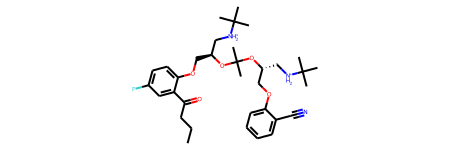

In [13]:
MolFromSmiles(x['product'])

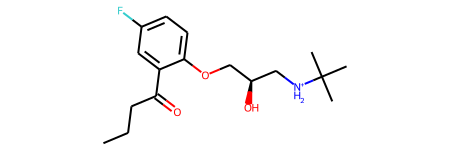

In [12]:
a = MolFromSmiles(x['reactants'][0])
a

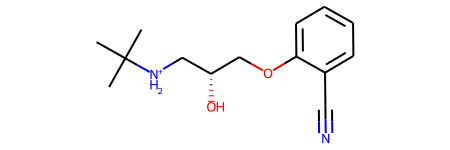

In [14]:
b = MolFromSmiles(x['reactants'][1])
b

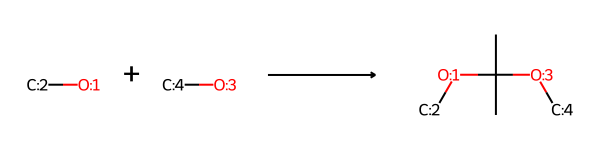

In [15]:
x = rdChemReactions.ReactionFromSmarts(x['reaction'])
x

In [19]:
y = x.RunReactants([a, b])[0][0]

yp = MolToSmiles(y)

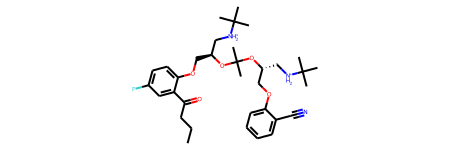

In [20]:
MolFromSmiles(yp)

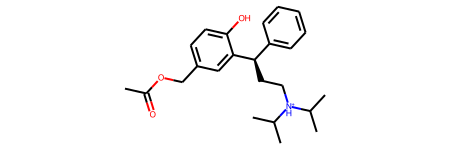

In [23]:
MolFromSmiles('CC(=O)OCc1ccc(O)c([C@H](CC[NH+](C(C)C)C(C)C)c2ccccc2)c1')

In [4]:
import pandas as pd
from rdkit.Chem import rdChemReactions
from rdkit.Chem import MolFromSmiles
import time

test_data = pd.read_csv('../../Data/Zinc/processed/test_zinc7_morgan.csv')['SMILES']
test_rxn = pd.read_csv('../../Data/Uspto/preprocessed/uspto-clean.csv')['reaction_smarts']



rxn = rdChemReactions.ReactionFromSmarts('[c:8]-[S;H0;D2;+0:7]-[c;H0;D3;+0:1]1:[#7;a:2]:[c:3]:[#7;a:4]:[c:5]:[c:6]:1>>Cl-[c;H0;D3;+0:1]1:[#7;a:2]:[c:3]:[#7;a:4]:[c:5]:[c:6]:1.[SH;D1;+0:7]-[c:8]')

rxn.Initialize()

ti = time.perf_counter()
out = [rxn.IsMoleculeReactant(MolFromSmiles(smi)) for smi in test_data]

print(f'time = {time.perf_counter()-ti}')
print(f'num_matches = {sum(out)}')
print(f'len = {test_data.shape}')

time = 0.3676772999999969
num_matches = 0
len = (1000,)


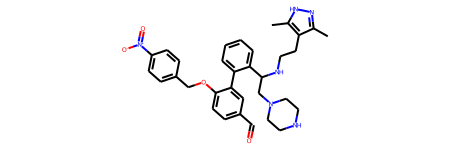

In [33]:
from rdkit.Chem.QED import default
x = MolFromSmiles("Cc1n[nH]c(C)c1CCNC(CN1CCNCC1)c1ccccc1-c1cc(C=O)ccc1OCc1ccc([N+](=O)[O-])cc1")
x

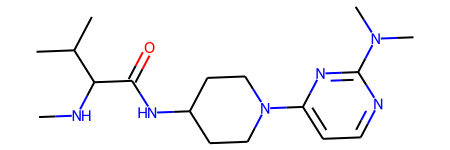

In [37]:
y = MolFromSmiles("CNC(C(=O)NC1CCN(c2ccnc(N(C)C)n2)CC1)C(C)C")
y

In [38]:
default(y)

0.8042302814985702

In [ ]:
"[{\"product\": \"Cc1ccn(C(C)C2CCCN2CC(C)(C)CN2CCOCC2)n1\", \"reaction\": \"[#6:4]-[C;H1,$([C&H0](-[#6])[#6]):1]=[O&D1].[N;H2,$([N&H1&D2](-,:C)C);!$(N-[#6]=*):3]-[C:5]>>[#6:4][C:1]-[N:3]-[C:5]\", \"reactants\": [\"CC(C)(CN1CCOCC1)C=O\", \"CC(C1NCCC1)n1nc(C)cc1\"]}, {\"product\": \"Cc1cc2nc(-c3cc(I)ccc3Cl)oc2c(NCCc2nc(N)n[nH]2)c1C\", \"reaction\": \"[Cl,Br,I][c&$(c1:[c,n]:[c,n]:[c,n]:[c,n]:[c,n]:1):1].[N;$(NC)&!$(N=*)&!$([N&-])&!$(N#*)&!$([N&D3])&!$([N&D4])&!$(N[c,O])&!$(N[C,S]=[S,O,N]),H2&$(Nc1:[c,n]:[c,n]:[c,n]:[c,n]:[c,n]:1):2]>>[c:1][N:2]\", \"reactants\": [\"Cc(c(C)c1Br)cc2c1oc(-c(cc(cc1)I)c1Cl)n2\", \"NCCc1nc(N)n[nH]1\"]}, {\"product\": \"Cc1cc2nc(-c3cc(I)ccc3Cl)oc2c(N2CCN(c3ccnc(Nc4ccc(F)cc4)n3)CC2)c1C\", \"reaction\": \"[Cl,Br,I][c&$(c1:[c,n]:[c,n]:[c,n]:[c,n]:[c,n]:1):1].[N;$(NC)&!$(N=*)&!$([N&-])&!$(N#*)&!$([N&D3])&!$([N&D4])&!$(N[c,O])&!$(N[C,S]=[S,O,N]),H2&$(Nc1:[c,n]:[c,n]:[c,n]:[c,n]:[c,n]:1):2]>>[c:1][N:2]\", \"reactants\": [\"Cc(c(C)c1Br)cc2c1oc(-c(cc(cc1)I)c1Cl)n2\", \"Fc(cc1)ccc1Nc1nc(N2CCNCC2)ccn1\"]}, {\"product\": \"CC1CCCCN1C(=O)Cc1ccc(NC(=O)COc2ccc(Br)cc2)cc1\", \"reaction\": \"[C&$(C=O):1][O&H1].[N&$(N[#6])&!$(N=*)&!$([N&-])&!$(N#*)&!$([N&D3])&!$([N&D4])&!$(N[O,N])&!$(N[C,S]=[S,O,N]):2]>>[C:1][N&+0:2]\", \"reactants\": [\"OC(COc(cc1)ccc1Br)=O\", \"CC(CCCC1)N1C(Cc(cc1)ccc1N)=O\"]}, {\"product\": \"CCCc1cc(NCC2CCCN(c3ncc(F)c(NC)n3)C2)nc(-c2cccnc2)n1\", \"reaction\": \"[c&!$(c1ccccc1)&$(c1[n,c]c[n,c]c[n,c]1):1][Cl,F].[N&$(NC)&!$(N=*)&!$([N&-])&!$(N#*)&!$([N&D3])&!$([N&D4])&!$(N[c,O])&!$(N[C,S]=[S,O,N]):2]>>[c:1][N:2]\", \"reactants\": [\"CNc(nc(nc1)Cl)c1F\", \"CCCc1nc(-c2cnccc2)nc(NCC2CNCCC2)c1\"]}, {\"product\": \"COc1ccccc1OCc1ncc(C(=O)Nc2ccc(OCc3cnn(C)c3)nc2)c(N2CCCC2)n1\", \"reaction\": \"[C&$(C=O):1][O&H1].[N&$(N[#6])&!$(N=*)&!$([N&-])&!$(N#*)&!$([N&D3])&!$([N&D4])&!$(N[O,N])&!$(N[C,S]=[S,O,N]):2]>>[C:1][N&+0:2]\", \"reactants\": [\"COc(cccc1)c1OCc(nc1)nc(N2CCCC2)c1C(O)=O\", \"Cn1ncc(COc(cc2)ncc2N)c1\"]}, {\"product\": \"CC(C(=O)N1CCN(C(C)C)CC1)c1cnn(Cn2ccc(C(=O)O)n2)c1\", \"reaction\": \"[#6&$([#6]~[#6])&!$([#6]~[S,N,O,P]):1][Cl,Br,I].[Cl,Br,I][#6&$([#6]~[#6])&!$([#6]~[S,N,O,P]):2]>>[#6:2][#6:1]\", \"reactants\": [\"OC(c1nn(Cn2ncc(Cl)c2)cc1)=O\", \"CC(C)N(CC1)CCN1C(C(C)Cl)=O\"]}, {\"product\": \"Nc1nc(CNc2cccc(-c3c(CO)nnn3-c3ccccc3F)c2)cs1\", \"reaction\": \"[Cl,Br,I][c&$(c1:[c,n]:[c,n]:[c,n]:[c,n]:[c,n]:1):1].[N;$(NC)&!$(N=*)&!$([N&-])&!$(N#*)&!$([N&D3])&!$([N&D4])&!$(N[c,O])&!$(N[C,S]=[S,O,N]),H2&$(Nc1:[c,n]:[c,n]:[c,n]:[c,n]:[c,n]:1):2]>>[c:1][N:2]\", \"reactants\": [\"OCc1c(-c2cccc(Cl)c2)n(-c(cccc2)c2F)nn1\", \"NCc1csc(N)n1\"]}, {\"product\": \"CNC(C(=O)NC1CCN(c2ccnc(N(C)C)n2)CC1)C(C)C\", \"reaction\": \"[C&$(C=O):1][O&H1].[N&$(N[#6])&!$(N=*)&!$([N&-])&!$(N#*)&!$([N&D3])&!$([N&D4])&!$(N[O,N])&!$(N[C,S]=[S,O,N]):2]>>[C:1][N&+0:2]\", \"reactants\": [\"CC(C)C(C(O)=O)NC\", \"CN(C)c1nc(N(CC2)CCC2N)ccn1\"]}]"

In [ ]:
"[{\"product\": \"Cc1cc(N=C=O)ccc1Nc1ccc(S(=O)(=O)N(C(C)C)C(C)C)cc1\", \"reaction\": \"[Cl,Br,I][c&$(c1:[c,n]:[c,n]:[c,n]:[c,n]:[c,n]:1):1].[N;$(NC)&!$(N=*)&!$([N&-])&!$(N#*)&!$([N&D3])&!$([N&D4])&!$(N[c,O])&!$(N[C,S]=[S,O,N]),H2&$(Nc1:[c,n]:[c,n]:[c,n]:[c,n]:[c,n]:1):2]>>[c:1][N:2]\", \"reactants\": [\"Cc(cc(cc1)N=C=O)c1Br\", \"CC(C)N(C(C)C)S(c(cc1)ccc1N)(=O)=O\"]}, {\"product\": \"COc1cc(C(CC(=O)N(CCc2c(C)n[nH]c2C)C(CN2CCN(C(=O)/C=C/c3ccc4c(c3)OCO4)CC2)c2ccccc2-c2cc(C=O)ccc2OCc2ccc([N+](=O)[O-])cc2)NC(=O)CC23CC4CC(C2)CC(n2cc(Br)c([N+](=O)[O-])n2)(C4)C3)cc(OC)c1OC\", \"reaction\": \"[C&$(C=O):1][O&H1].[N&$(N[#6])&!$(N=*)&!$([N&-])&!$(N#*)&!$([N&D3])&!$([N&D4])&!$(N[O,N])&!$(N[C,S]=[S,O,N]):2]>>[C:1][N&+0:2]\", \"reactants\": [\"OC(/C=C/c(cc1)cc2c1OCO2)=O\", {\"product\": \"COc1cc(C(CC(=O)N(CCc2c(C)n[nH]c2C)C(CN2CCNCC2)c2ccccc2-c2cc(C=O)ccc2OCc2ccc([N+](=O)[O-])cc2)NC(=O)CC23CC4CC(C2)CC(n2cc(Br)c([N+](=O)[O-])n2)(C4)C3)cc(OC)c1OC\", \"reaction\": \"[C&$(C=O):1][O&H1].[N&$(N[#6])&!$(N=*)&!$([N&-])&!$(N#*)&!$([N&D3])&!$([N&D4])&!$(N[O,N])&!$(N[C,S]=[S,O,N]):2]>>[C:1][N&+0:2]\", \"reactants\": [\"[O-][N+](c1nn(C2(CC(C3)C4)CC4(CC(O)=O)CC3C2)cc1Br)=O\", {\"product\": \"COc1cc(C(N)CC(=O)N(CCc2c(C)n[nH]c2C)C(CN2CCNCC2)c2ccccc2-c2cc(C=O)ccc2OCc2ccc([N+](=O)[O-])cc2)cc(OC)c1OC\", \"reaction\": \"[C&$(C=O):1][O&H1].[N&$(N[#6])&!$(N=*)&!$([N&-])&!$(N#*)&!$([N&D3])&!$([N&D4])&!$(N[O,N])&!$(N[C,S]=[S,O,N]):2]>>[C:1][N&+0:2]\", \"reactants\": [\"COc1cc(C(CC(O)=O)N)cc(OC)c1OC\", {\"product\": \"Cc1n[nH]c(C)c1CCNC(CN1CCNCC1)c1ccccc1-c1cc(C=O)ccc1OCc1ccc([N+](=O)[O-])cc1\", \"reaction\": \"[#6;$(C=C-[#6]),$(c:c):1][Br,I].[Cl,Br,I][c:2]>>[c:2][#6:1]\", \"reactants\": [\"[O-][N+](c1ccc(COc(ccc(C=O)c2)c2Br)cc1)=O\", {\"product\": \"Cc1n[nH]c(C)c1CCNC(CN1CCNCC1)c1ccccc1Cl\", \"reaction\": \"[#6:4]-[C;H1,$([C&H0](-[#6])[#6]):1]=[O&D1].[N;H2,$([N&H1&D2](-,:C)C);!$(N-[#6]=*):3]-[C:5]>>[#6:4][C:1]-[N:3]-[C:5]\", \"reactants\": [\"O=C(CN1CCNCC1)c(cccc1)c1Cl\", \"Cc1c(CCN)c(C)n[nH]1\"]}]}]}]}]}, {\"product\": \"Cc1cc(N=C=O)ccc1N1CCCC1c1cc(C(C)C)no1\", \"reaction\": \"[Cl,Br,I][c&$(c1:[c,n]:[c,n]:[c,n]:[c,n]:[c,n]:1):1].[N;$(NC)&!$(N=*)&!$([N&-])&!$(N#*)&!$([N&D3])&!$([N&D4])&!$(N[c,O])&!$(N[C,S]=[S,O,N]),H2&$(Nc1:[c,n]:[c,n]:[c,n]:[c,n]:[c,n]:1):2]>>[c:1][N:2]\", \"reactants\": [\"Cc(cc(cc1)N=C=O)c1Br\", \"CC(C)c1noc(C2NCCC2)c1\"]}]"

In [ ]:
"[{\"product\": \"COCCc1noc(-c2ccc(N3CCC(C(=O)Nc4ccn(-c5ccccc5)n4)CC3)nc2)n1\", \"reaction\": \"[C&$(C=O):1][O&H1].[N&$(N[#6])&!$(N=*)&!$([N&-])&!$(N#*)&!$([N&D3])&!$([N&D4])&!$(N[O,N])&!$(N[C,S]=[S,O,N]):2]>>[C:1][N&+0:2]\", \"reactants\": [\"COCCc1noc(-c(cc2)cnc2N(CC2)CCC2C(O)=O)n1\", \"Nc(cc1)nn1-c1ccccc1\"]}, {\"product\": \"CCOC(=O)c1cc(-c2ccc(OC)cc2)n2c1N(C(=O)C1CCN(c3ccc(-c4nc(CCOC)no4)cn3)CC1)CC2\", \"reaction\": \"[C&$(C=O):1][O&H1].[N&$(N[#6])&!$(N=*)&!$([N&-])&!$(N#*)&!$([N&D3])&!$([N&D4])&!$(N[O,N])&!$(N[C,S]=[S,O,N]):2]>>[C:1][N&+0:2]\", \"reactants\": [\"COCCc1noc(-c(cc2)cnc2N(CC2)CCC2C(O)=O)n1\", \"CCOC(c1c(NCC2)n2c(-c(cc2)ccc2OC)c1)=O\"]}, {\"product\": \"COc1ccc(-c2cc3c(N4CCCC(NC(=O)c5ccc6c(c5)CCN6C(=O)C5CCCC5)C4)nccn3n2)cc1OC\", \"reaction\": \"[C&$(C=O):1][O&H1].[N&$(N[#6])&!$(N=*)&!$([N&-])&!$(N#*)&!$([N&D3])&!$([N&D4])&!$(N[O,N])&!$(N[C,S]=[S,O,N]):2]>>[C:1][N&+0:2]\", \"reactants\": [\"OC(c(cc1)cc(CC2)c1N2C(C1CCCC1)=O)=O\", \"COc(ccc(-c1nn(ccnc2N(CCC3)CC3N)c2c1)c1)c1OC\"]}, {\"product\": \"CC(C)N(CCN1CCCCCC1)C(=O)CSc1nc(-c2cccc(F)c2)no1\", \"reaction\": \"[C&$(C=O):1][O&H1].[N&$(N[#6])&!$(N=*)&!$([N&-])&!$(N#*)&!$([N&D3])&!$([N&D4])&!$(N[O,N])&!$(N[C,S]=[S,O,N]):2]>>[C:1][N&+0:2]\", \"reactants\": [\"OC(CSc1nc(-c2cc(F)ccc2)no1)=O\", \"CC(C)NCCN1CCCCCC1\"]}, {\"product\": \"CC(Sc1ccccn1)C(=O)NC(C(=O)N1CCc2[nH]c3c(C(=O)O)cccc3c2C1)C(C)C\", \"reaction\": \"[C&$(C=O):1][O&H1].[N&$(N[#6])&!$(N=*)&!$([N&-])&!$(N#*)&!$([N&D3])&!$([N&D4])&!$(N[O,N])&!$(N[C,S]=[S,O,N]):2]>>[C:1][N&+0:2]\", \"reactants\": [\"CC(C)C(C(O)=O)NC(C(C)Sc1ncccc1)=O\", \"OC(c1c2[nH]c(CCNC3)c3c2ccc1)=O\"]}, {\"product\": \"CCOC(Cn1nc(C)c(C2(O)C(=O)Nc3c(C)cc([N+](=O)[O-])cc32)c1C)OCC\", \"reaction\": \"[#6:1][C;H1,$(C(-,:[#6])[#6]):2]=[O&D1:3].[Cl,Br,I][#6&$([#6]~[#6])&!$([#6](-,:[Cl,Br,I])[Cl,Br,I])&!$([#6]=O):4]>>[C:1][#6:2](-,:[O&H1:3])[#6:4]\", \"reactants\": [\"Cc(cc(cc1C2=O)[N+]([O-])=O)c1NC2=O\", \"CCOC(Cn1nc(C)c(Cl)c1C)OCC\"]}]"